In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, column_list, target_column):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    column_list - список назв колонок-характеристик
    target_column - назва колонки з цільовою величиною
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [5]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    mean = X.mean()
    std = X.std()
    X_new = (X - mean)/std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    # Один рядок коду
    ######################
    h_thetha =(pd.DataFrame(X) * pd.Series(theta)).sum(axis=1)
    return h_thetha

In [8]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    J = 1/(2*m)*sum((hypothesis(pd.DataFrame(X), pd.Series(theta)) - y)**2)
    ######################
    return J

In [9]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
    d_thetha = 1/m * pd.DataFrame(X).mul(hypothesis(pd.DataFrame(X), pd.Series(theta)) - pd.Series(y), axis = 0).sum()
    ######################
    return d_thetha

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [25]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [26]:
X, y = load_datasets('burrito.csv', ["population"], "profit")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))


Dataset: X=(97, 1), y=(97,)


In [27]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

Розбиття датасету на частини:

In [28]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

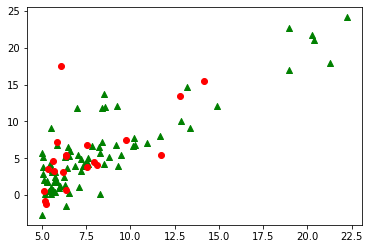

In [29]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [30]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

Для спрощення записів аліас для вектора передбачуваних значень

In [31]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [32]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
33.36753543887857


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [33]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: 5.84; Theta 1: 4.59

In [34]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.919037411938438; Theta 1: 4.937356742756456


Відображення штрафної функції як функції від thetha0, thetha1.

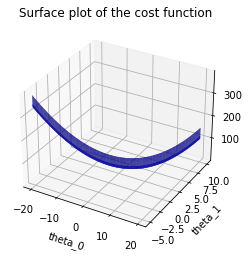

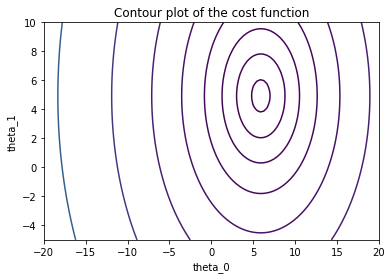

In [35]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

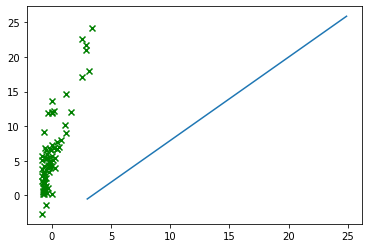

In [37]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X[:, 1], y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [82]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test - mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
res = pd.DataFrame({'X' : np.transpose(X_test).reshape((20,)), 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred         err
0    6.1101  17.59200   3.348497   80.965794
1   14.1640  15.50500  18.734790   20.830634
2    6.3557   0.67861   3.817695  462.575766
3    6.1891   3.13860   3.499420   11.496216
4    5.2524  -1.22000   1.709934  240.158558
5   12.8280  13.50100  16.182475   19.861308
6    5.6397   4.60420   2.449838   46.791230
7    5.7107   3.25220   2.585478   20.500656
8    6.3654   5.30480   3.836226   27.683863
9    5.1793  -0.74279   1.570283  311.403366
10   6.3534   5.49740   3.813301   30.634455
11   7.5386   3.88450   6.077525   56.455797
12   7.9334   4.56230   6.831757   49.743711
13  11.7080   5.38540  14.042810  160.757051
14   5.1301   0.56077   1.476291  163.261344
15   7.5402   6.75040   6.080582    9.922640
16   8.0959   4.11640   7.142200   73.505971
17   5.3794   3.51290   1.952557   44.417515
18   9.7687   7.54350  10.337942   37.044372
19   5.8707   7.20290   2.891144   59.861388
9.467111012560649
